In [24]:
import re
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [18]:
random_seed = [10, 20, 30, 42, 123]
data_percentage = ["025", "05", "075", "100" ]
logs_dir = r"logs"
lora_types = ["serial_lora", "lora", "localized_lora"]
file_path = Path(logs_dir) / f"{lora_types[0]}_{data_percentage[0]}pct_seed{random_seed[0]}.out"

In [19]:
pattern = re.compile(
    r"Epoch \[(\d+)/\d+\] - Train Loss: ([0-9.]+) \| Val Loss: ([0-9.]+) \| Val Dice: ([0-9.]+)"
)

In [13]:
epochs, train_loss, val_loss, val_dice = [], [], [], []

In [ ]:
results = {}
for lora_type in lora_types:
    results[lora_type] = {}
    for pct in data_percentage:
        results[lora_type][pct] = {
            "epochs": [],
            "train_loss": [],
            "val_loss": [],
            "val_dice": []
        }
for lora_type in lora_types:
    for pct in data_percentage:
        # Temporary storage for all seeds
        seed_data = {
            "epochs": [],
            "train_loss": [],
            "val_loss": [],
            "val_dice": []
        }
        
        for seed in random_seed:
            # Build correct file path
            file_path = Path(logs_dir) / f"{lora_type}_{pct}pct_seed{seed}.out"
            
            # Temporary lists for this seed
            epochs_temp = []
            train_loss_temp = []
            val_loss_temp = []
            val_dice_temp = []
            
            try:
                with open(file_path, "r") as f:
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            epochs_temp.append(int(match.group(1)))
                            train_loss_temp.append(float(match.group(2)))
                            val_loss_temp.append(float(match.group(3)))
                            val_dice_temp.append(float(match.group(4)))
                
                # Store this seed's data
                seed_data["epochs"].append(epochs_temp)
                seed_data["train_loss"].append(train_loss_temp)
                seed_data["val_loss"].append(val_loss_temp)
                seed_data["val_dice"].append(val_dice_temp)
            
            except FileNotFoundError:
                print(f"Warning: File not found - {file_path}")
        
        # Average across seeds
        if seed_data["train_loss"]:
            results[lora_type][pct]["epochs"] = seed_data["epochs"][0]  # Epochs should be the same
            results[lora_type][pct]["train_loss"] = np.median(seed_data["train_loss"], axis=0).tolist()
            results[lora_type][pct]["val_loss"] = np.median(seed_data["val_loss"], axis=0).tolist()
            results[lora_type][pct]["val_dice"] = np.median(seed_data["val_dice"], axis=0).tolist()


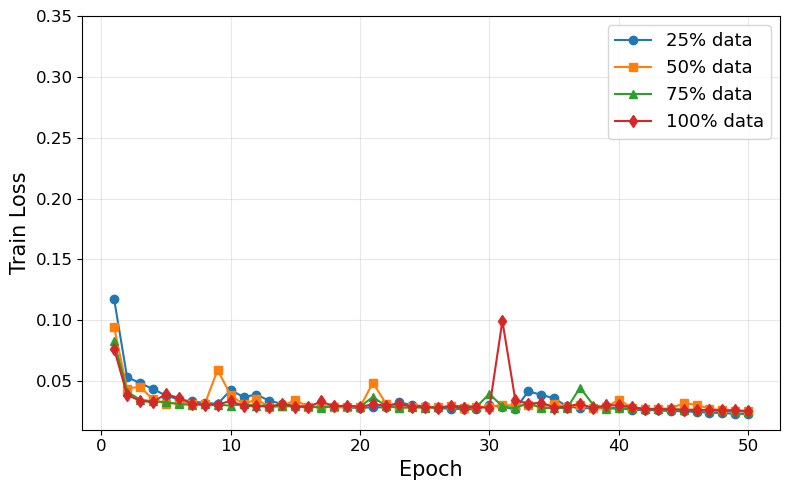

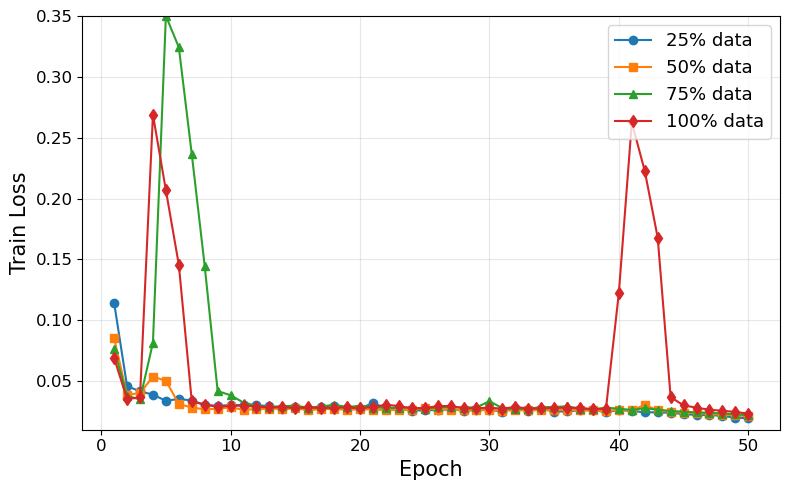

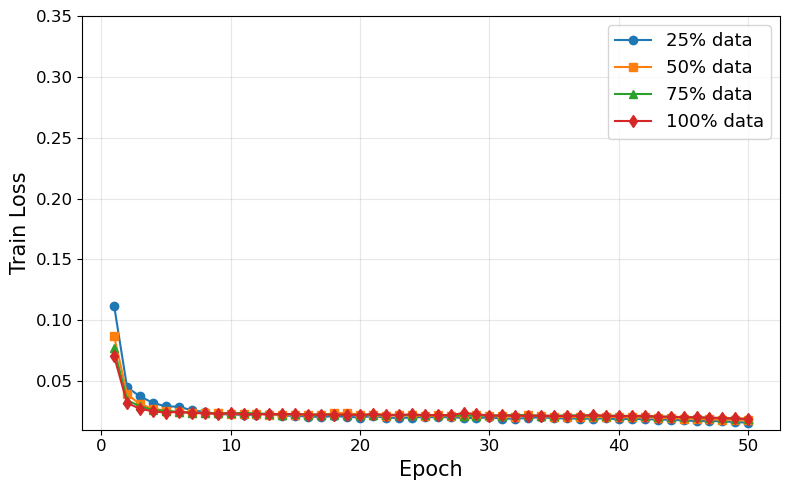

In [43]:
# Create a separate plot for each lora type
for lora_type in lora_types:
    plt.figure(figsize=(8, 5))
    
    # Plot each data percentage
    plt.plot(results[lora_type]["025"]["epochs"], 
             results[lora_type]["025"]["train_loss"], 
             marker='o', label="25% data")
    plt.plot(results[lora_type]["05"]["epochs"], 
             results[lora_type]["05"]["train_loss"], 
             marker='s', label="50% data")
    plt.plot(results[lora_type]["075"]["epochs"], 
             results[lora_type]["075"]["train_loss"], 
             marker='^', label="75% data")
    plt.plot(results[lora_type]["100"]["epochs"], 
             results[lora_type]["100"]["train_loss"], 
             marker='d', label="100% data")
    
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("Train Loss", fontsize=15)
    # plt.title(f"Train Loss {lora_type} (Seed 20)", fontsize=14)
    plt.legend(loc="upper right", fontsize=13)
    plt.tick_params(labelsize="large")
    plt.ylim(0.01, 0.35)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

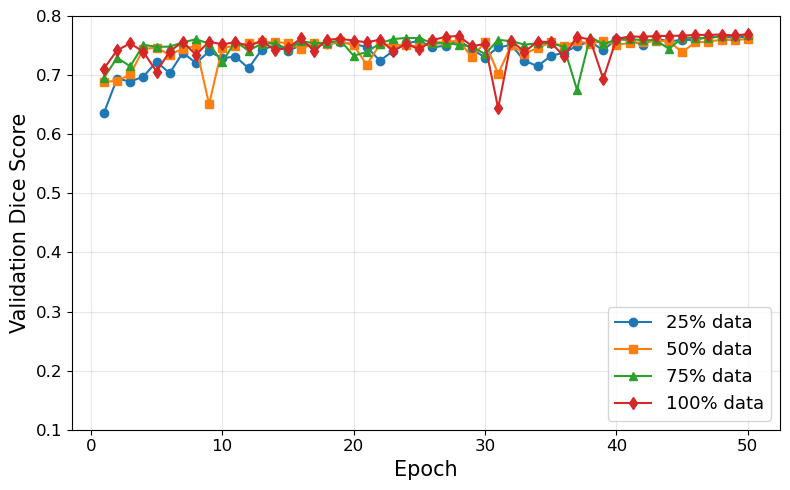

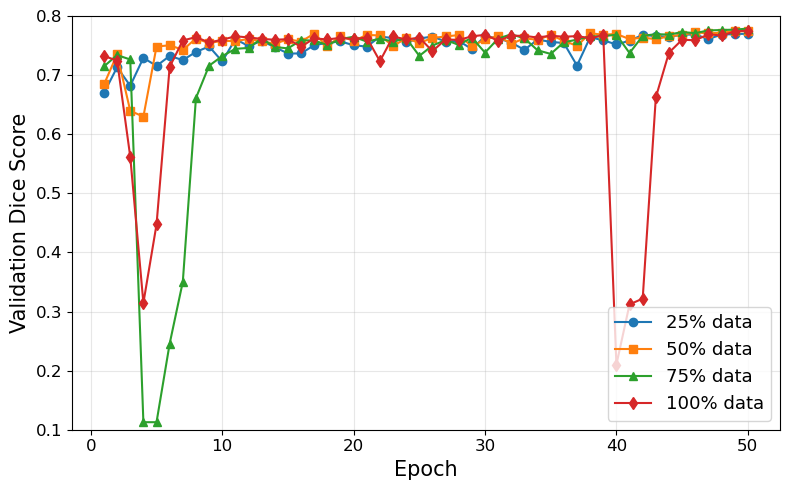

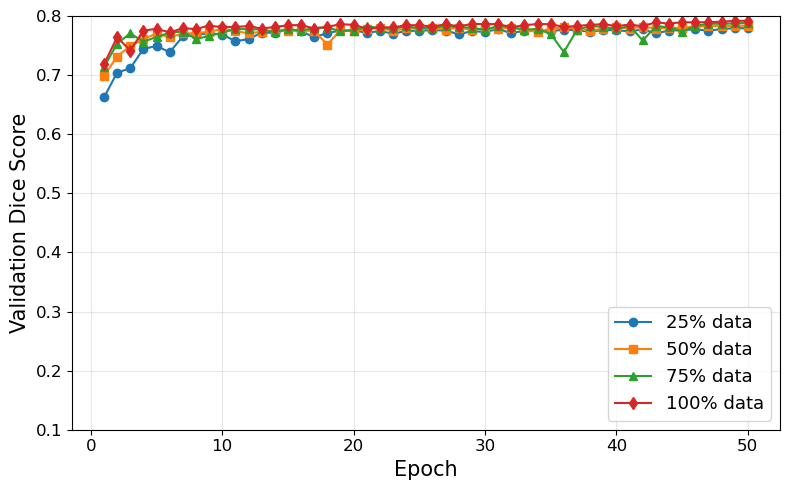

In [44]:
for lora_type in lora_types:
    plt.figure(figsize=(8, 5))
    
    # Plot each data percentage
    plt.plot(results[lora_type]["025"]["epochs"], 
             results[lora_type]["025"]["val_dice"], 
             marker='o', label="25% data")
    plt.plot(results[lora_type]["05"]["epochs"], 
             results[lora_type]["05"]["val_dice"], 
             marker='s', label="50% data")
    plt.plot(results[lora_type]["075"]["epochs"], 
             results[lora_type]["075"]["val_dice"], 
             marker='^', label="75% data")
    plt.plot(results[lora_type]["100"]["epochs"], 
             results[lora_type]["100"]["val_dice"], 
             marker='d', label="100% data")
    
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("Validation Dice Score", fontsize=15)
    # plt.title(f"Train Loss {lora_type} (Seed 20)", fontsize=14)
    plt.legend(loc="lower right", fontsize=13)
    plt.tick_params(labelsize="large")
    plt.ylim(0.1, 0.8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [25]:
import re
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

random_seed = [10, 20, 30, 42, 123]
data_percentage = ["025", "05", "075", "100"]
logs_dir = r"logs"
lora_types = ["serial_lora", "lora", "localized_lora"]

pattern = re.compile(
    r"Epoch \[(\d+)/\d+\] - Train Loss: ([0-9.]+) \| Val Loss: ([0-9.]+) \| Val Dice: ([0-9.]+)"
)

# Store data for each seed separately
results = {}
for lora_type in lora_types:
    results[lora_type] = {}
    for pct in data_percentage:
        results[lora_type][pct] = {}
        for seed in random_seed:
            results[lora_type][pct][seed] = {
                "epochs": [],
                "train_loss": [],
                "val_loss": [],
                "val_dice": []
            }

# Collect data for each seed
for lora_type in lora_types:
    for pct in data_percentage:
        for seed in random_seed:
            file_path = Path(logs_dir) / f"{lora_type}_{pct}pct_seed{seed}.out"
            
            try:
                with open(file_path, "r") as f:
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            results[lora_type][pct][seed]["epochs"].append(int(match.group(1)))
                            results[lora_type][pct][seed]["train_loss"].append(float(match.group(2)))
                            results[lora_type][pct][seed]["val_loss"].append(float(match.group(3)))
                            results[lora_type][pct][seed]["val_dice"].append(float(match.group(4)))
            
            except FileNotFoundError:
                print(f"Warning: File not found - {file_path}")

# Now plot individual seeds

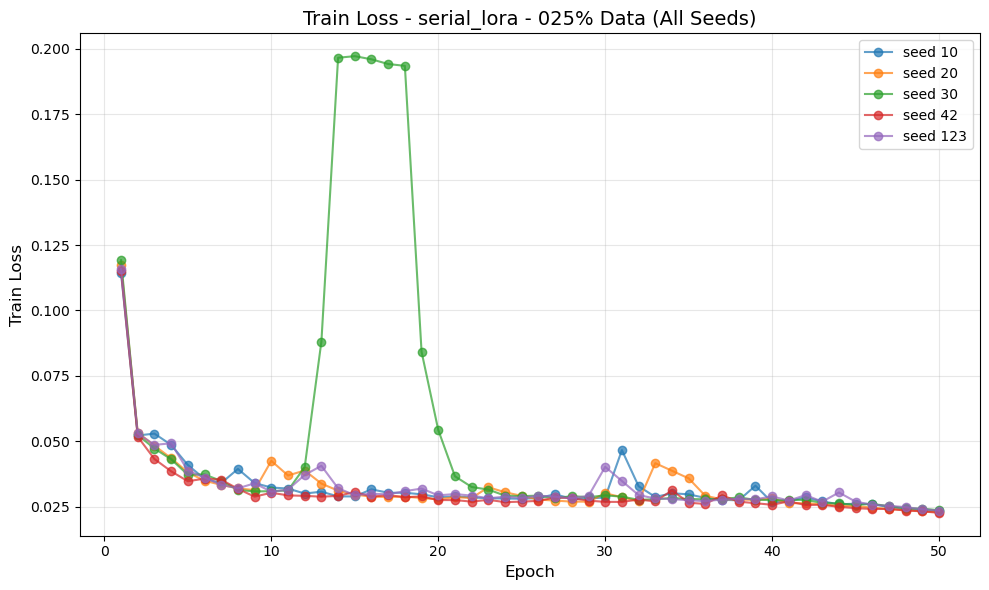

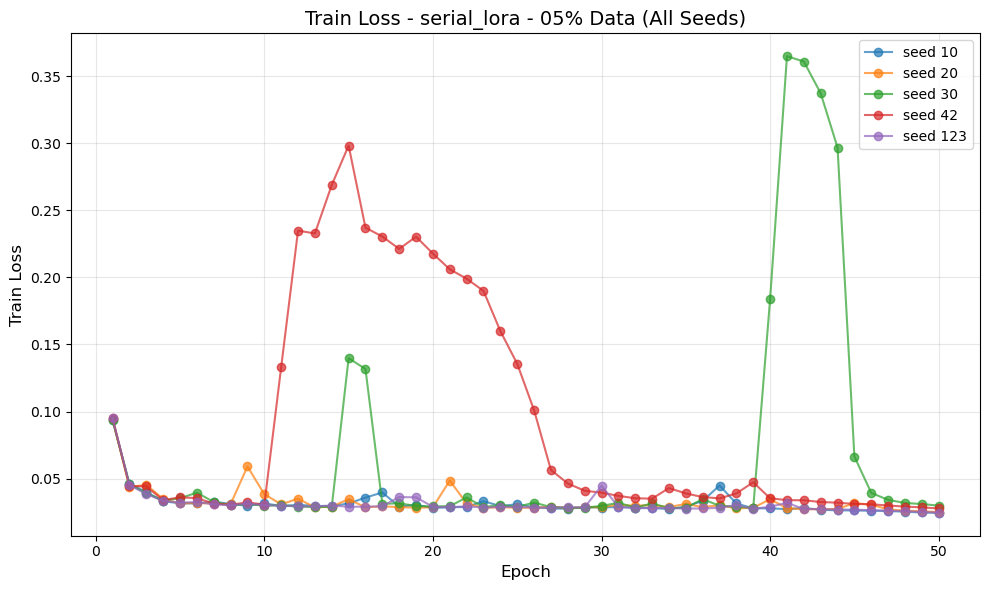

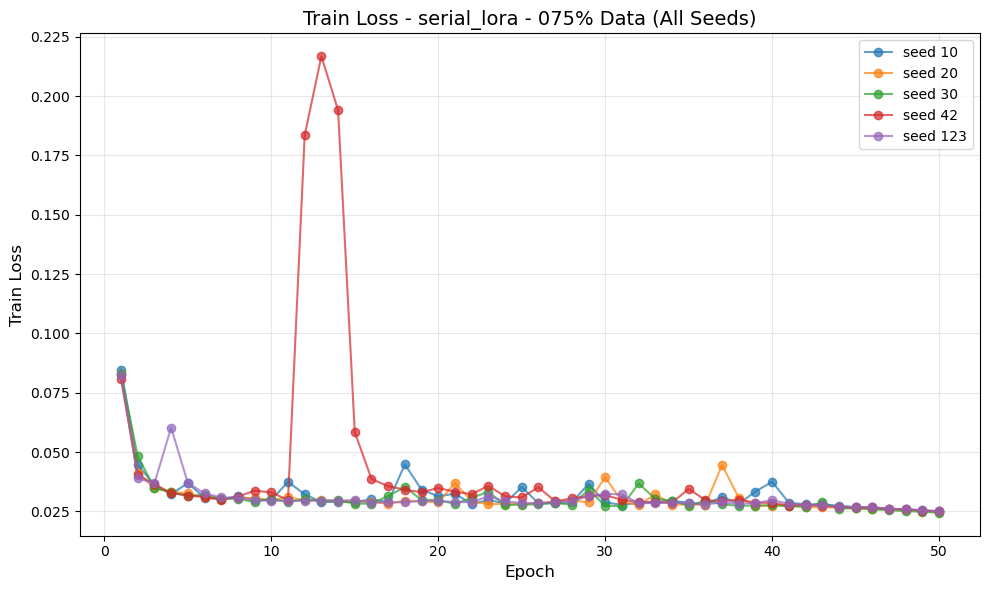

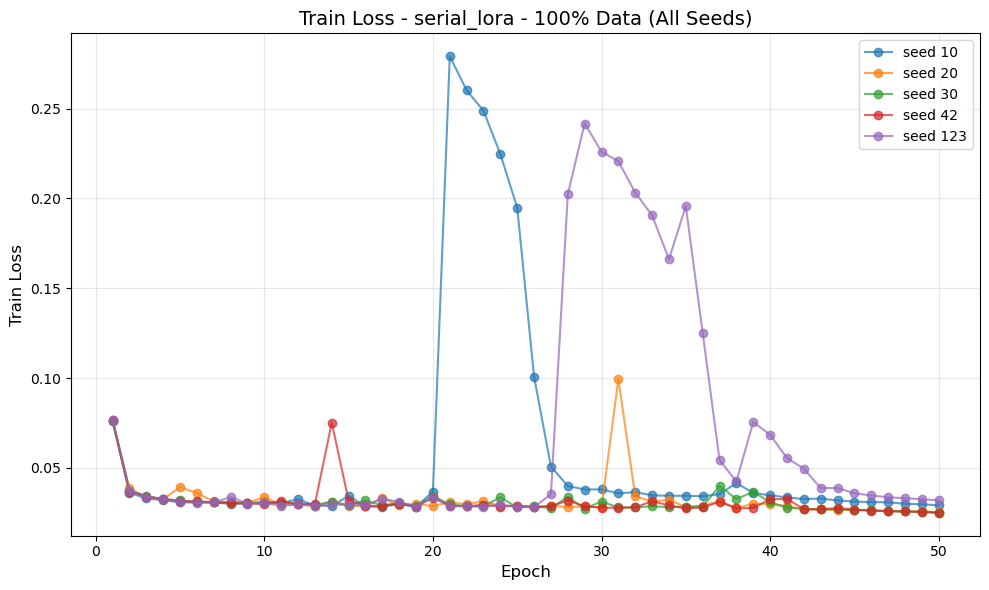

In [28]:
# Example: Plot all seeds for serial_lora with 25% data
lora_type = "serial_lora"
pct = "025"
for pct in data_percentage:
    plt.figure(figsize=(10, 6))
    for seed in random_seed:
        plt.plot(results[lora_type][pct][seed]["epochs"], 
                results[lora_type][pct][seed]["train_loss"], 
                marker='o', label=f"seed {seed}", alpha=0.7)

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Train Loss", fontsize=12)
    plt.title(f"Train Loss - {lora_type} - {pct}% Data (All Seeds)", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

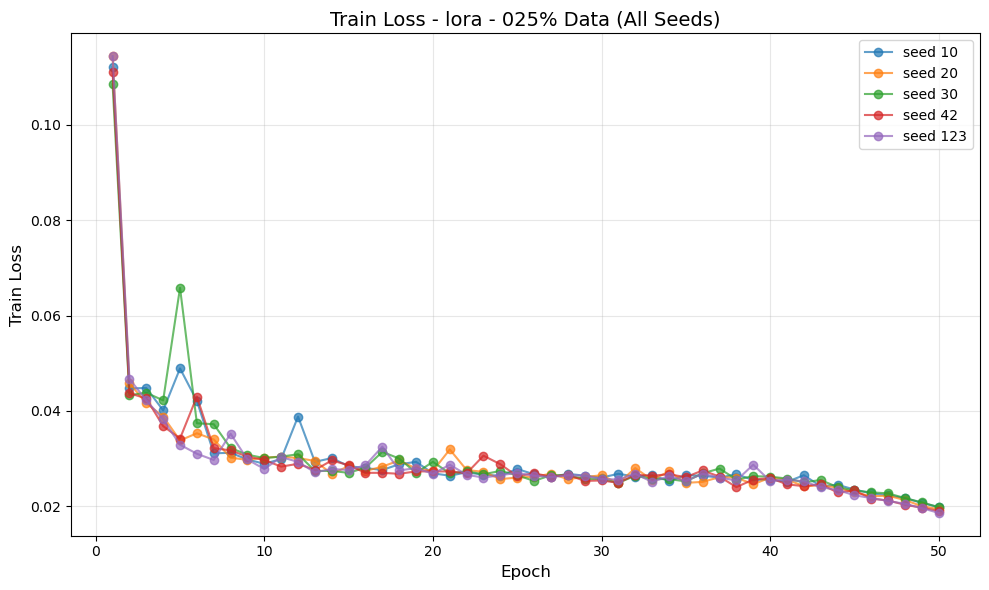

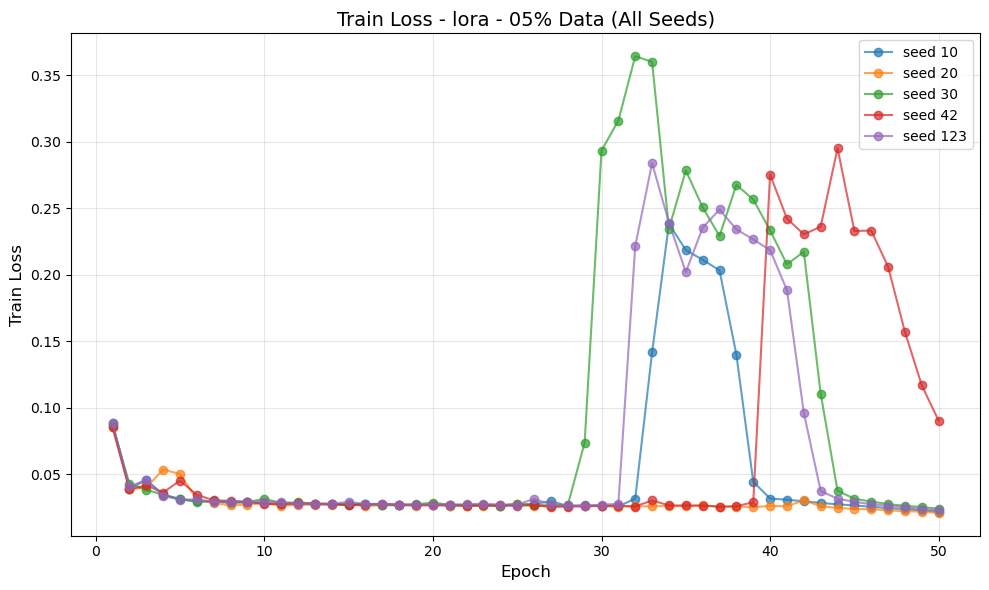

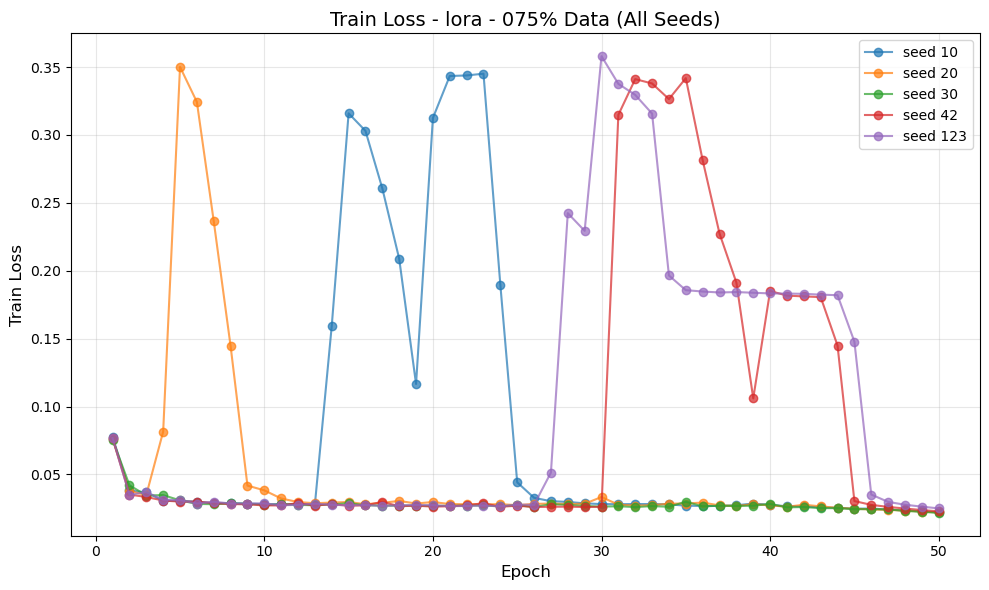

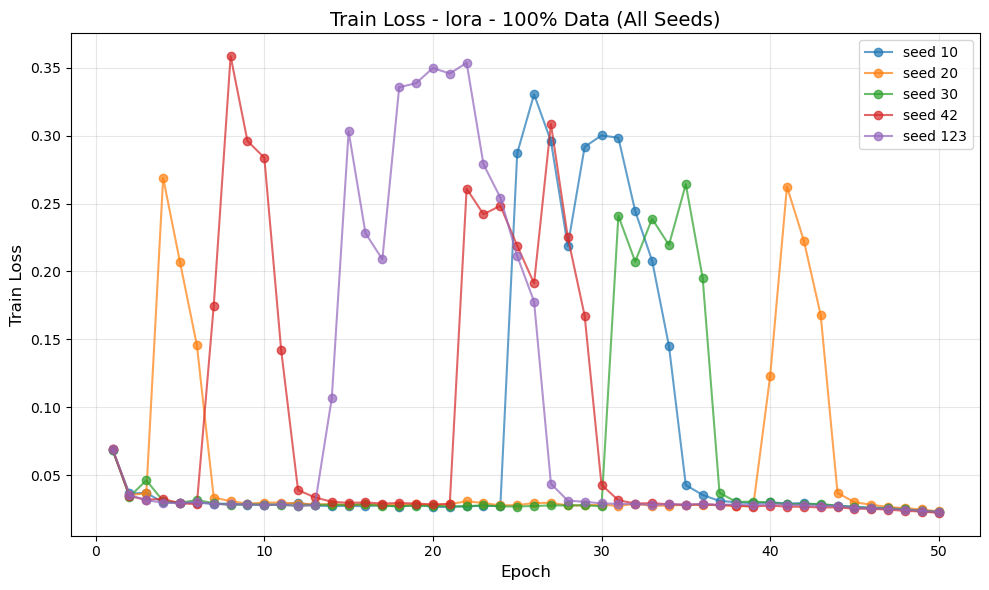

In [ ]:
lora_type = "lora"
for pct in data_percentage:
    plt.figure(figsize=(10, 6))
    for seed in random_seed:
        plt.plot(results[lora_type][pct][seed]["epochs"], 
                results[lora_type][pct][seed]["train_loss"], 
                marker='o', label=f"seed {seed}", alpha=0.7)

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Train Loss", fontsize=12)
    plt.title(f"Train Loss - {lora_type} - {pct}% Data (All Seeds)", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [2]:
import re
from pathlib import Path
import matplotlib.pyplot as plt

random_seed = [20]  # Only seed 20
data_percentage = ["025", "05", "075", "100"]
logs_dir = r"logs"
lora_types = ["serial_lora", "lora", "localized_lora"]

pattern = re.compile(
    r"Epoch \[(\d+)/\d+\] - Train Loss: ([0-9.]+) \| Val Loss: ([0-9.]+) \| Val Dice: ([0-9.]+)"
)

# Store data for seed 20 only
results = {}
for lora_type in lora_types:
    results[lora_type] = {}
    for pct in data_percentage:
        results[lora_type][pct] = {
            "epochs": [],
            "train_loss": [],
            "val_loss": [],
            "val_dice": []
        }

# Collect data for seed 20
for lora_type in lora_types:
    for pct in data_percentage:
        file_path = Path(logs_dir) / f"{lora_type}_{pct}pct_seed20.out"
        
        try:
            with open(file_path, "r") as f:
                for line in f:
                    match = pattern.search(line)
                    if match:
                        results[lora_type][pct]["epochs"].append(int(match.group(1)))
                        results[lora_type][pct]["train_loss"].append(float(match.group(2)))
                        results[lora_type][pct]["val_loss"].append(float(match.group(3)))
                        results[lora_type][pct]["val_dice"].append(float(match.group(4)))
        
        except FileNotFoundError:
            print(f"Warning: File not found - {file_path}")

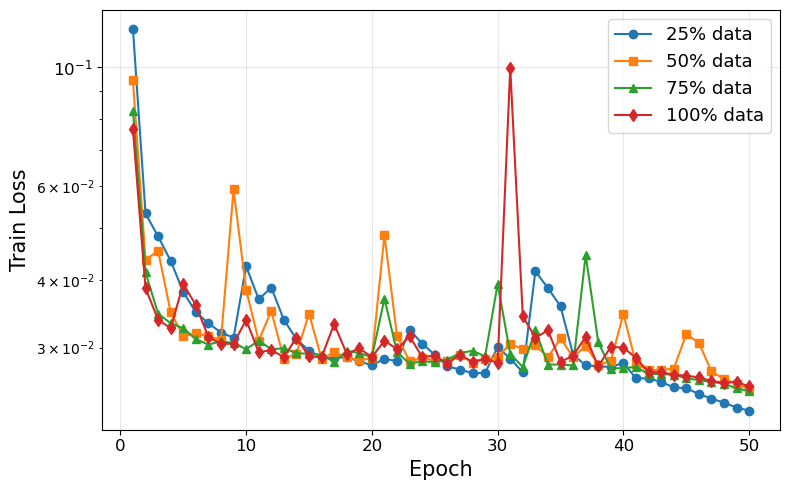

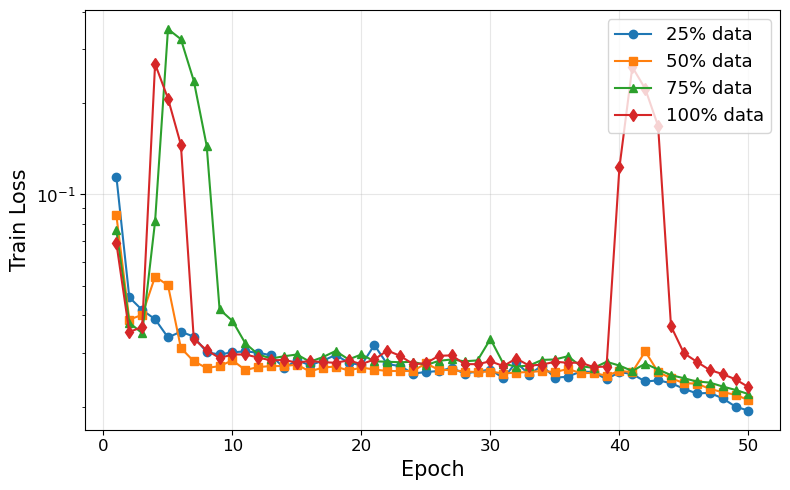

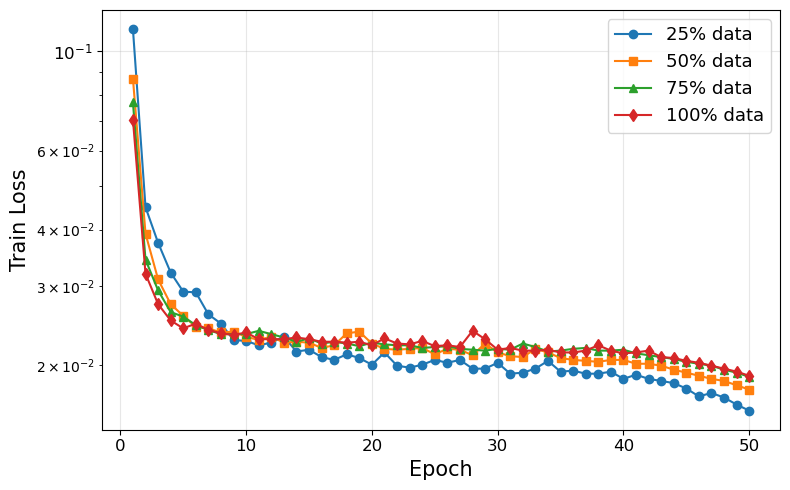

In [ ]:
# Plot for each lora type
for lora_type in lora_types:
    plt.figure(figsize=(8, 5))
    
    plt.plot(results[lora_type]["025"]["epochs"], 
             results[lora_type]["025"]["train_loss"], 
             marker='o', label="25% data")
    plt.plot(results[lora_type]["05"]["epochs"], 
             results[lora_type]["05"]["train_loss"], 
             marker='s', label="50% data")
    plt.plot(results[lora_type]["075"]["epochs"], 
             results[lora_type]["075"]["train_loss"], 
             marker='^', label="75% data")
    plt.plot(results[lora_type]["100"]["epochs"], 
             results[lora_type]["100"]["train_loss"], 
             marker='d', label="100% data")
    
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("Train Loss", fontsize=15)
    # plt.title(f"Train Loss {lora_type} (Seed 20)", fontsize=14)
    plt.legend(loc="upper right", fontsize=13)
    plt.tick_params(labelsize="large")
    plt.yscale("log")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

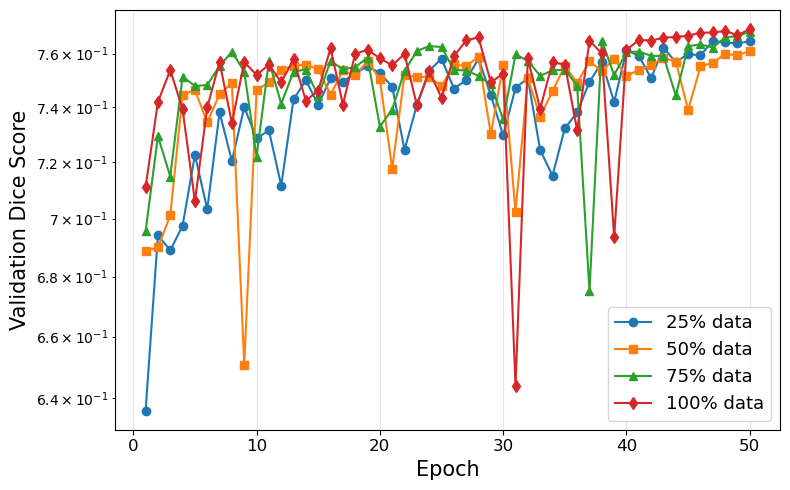

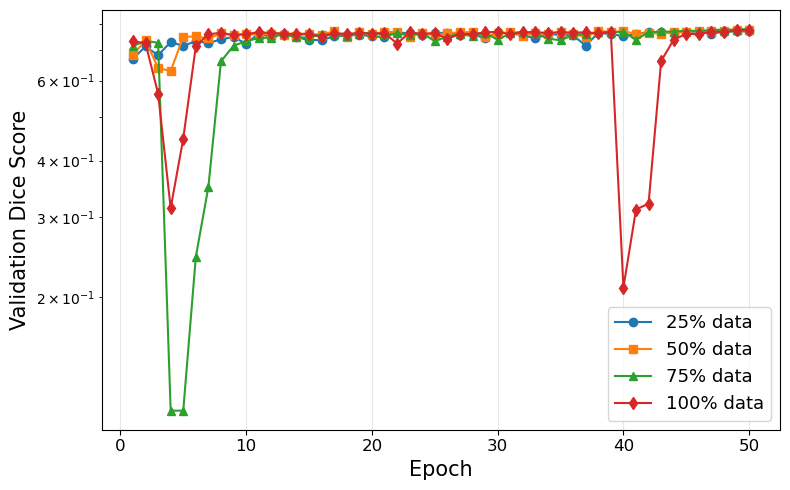

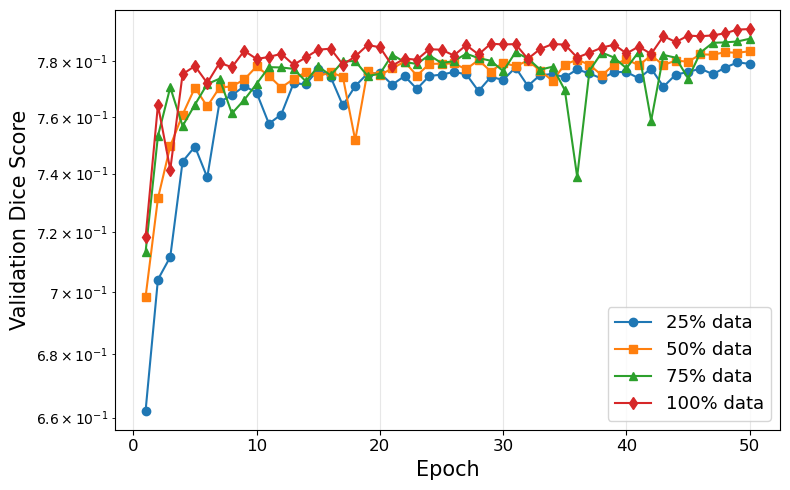

In [22]:
# Plot for each lora type
for lora_type in lora_types:
    plt.figure(figsize=(8, 5))
    
    plt.plot(results[lora_type]["025"]["epochs"], 
             results[lora_type]["025"]["val_dice"], 
             marker='o', label="25% data")
    plt.plot(results[lora_type]["05"]["epochs"], 
             results[lora_type]["05"]["val_dice"], 
             marker='s', label="50% data")
    plt.plot(results[lora_type]["075"]["epochs"], 
             results[lora_type]["075"]["val_dice"], 
             marker='^', label="75% data")
    plt.plot(results[lora_type]["100"]["epochs"], 
             results[lora_type]["100"]["val_dice"], 
             marker='d', label="100% data")
    
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel("Validation Dice Score", fontsize=15)
    # plt.title(f"Train Loss {lora_type} (Seed 20)", fontsize=14)
    plt.legend(loc="lower right", fontsize=13)
    plt.tick_params(labelsize="large")
    plt.yscale("log")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()